# Udemy Pricing Model for Revenue Optimization

Xi Chen, Yiyun Fan, Fernando Ramirez

December 29, 2021

# 1. Introduction

In this project we will explore the industry of education with Udemy. Udemy is one of the biggest massive online open course (MOOC) platform with over 155000 courses and 40 million students. Udemy offers both free and paid courses. We have obtained data from Kaggle that will provide information regarding the type of courses offered and how popular they are. We started by performing Exploratory Data Analysis (EDA) to investigate different variables present in the dataset and their statistical properties. As part of EDA, we explored what types of content are most successful on Udemy. We also performed our analysis from the lens of the users of the Udemy platform, including both content creators (teachers) and consumers (students), by exploring questions such as: 
- What are the most popular or reviewed courses on Udemy?
- What are the best free and paid courses by subject?
- Which courses generated the most revenue/profit? 

For this report, we built a machine learning model to determine the optimal pricing for revenue maximization 

# 2. About the Data

## 2.1. Data Source

This dataset is a free, public resource in csv format downloaded from Kaggle. Link to data: https://www.kaggle.com/andrewmvd/udemy-courses

## 2.2. Data Attributes

This dataset is compiled with a description of 3678 unique values and 12 columns over four (4) subjects (Business Finance, Graphic Design, Musical Instruments and Web Design). Some key features include: 

    A. course titles 
    
    B. urls
    
    C. is_paid
    
    D. #price
    
    E. #of_subscribers 
    
    D. #of_reviews 
    
    F. #num_lectures
    
    G. level 
    
    F. content durations 

In [1]:
# reading file and viewing the first few rows
import pandas as pd 
udemy = pd.read_csv('./udemy_courses.csv')
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


# 3. Data Exploration

## 3.1. Data Preparation and Pre-Processing

In [2]:
# importing libraries
import numpy as np
import seaborn as sns 

%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mping

udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


From the data infor below, we see that none of the columns have missing values. The dataset looks clean and no further cleaning needs to be done.

In [3]:
udemy.shape
# the datset has 3678 data-enteries with 12 unique columns 

(3678, 12)

In [4]:
udemy.info()
#cleaned data which have matching counts for non-null datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Among the columns, course_id, course_title, and url will need to be removed from the model to avoid overfitting, as they serve as unique identifiers of the courses. The column published_timestamp will need to be transformed to datetime object. 

In [5]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

## 3.2. Exploratory Data Analysis

### 3.2.1. EDA of Categorical Features

We begin the EDA with looking at distribution of the important categorical features. We noticed that most of these columns are unbalanced, including "is_paid", "level", and "subject" that we will address during the machine learning process using stratification.

In [6]:
#look at the key categorical features 
cat_features = ['level','published_timestamp','subject']
print("Percentages of all Categorical Features  :", '\n\n')
for feature in cat_features:
    values = udemy[feature].value_counts(normalize=True)
    print(values*100, '\n\n')

Percentages of all Categorical Features  : 


All Levels            52.446982
Beginner Level        34.529636
Intermediate Level    11.446438
Expert Level           1.576944
Name: level, dtype: float64 


2016-05-16 18:28:30+00:00    0.054377
2014-04-15 21:48:55+00:00    0.054377
2016-12-15 14:56:17+00:00    0.054377
2013-01-03 00:55:31+00:00    0.054377
2017-07-02 14:29:35+00:00    0.054377
                               ...   
2016-03-11 20:11:22+00:00    0.027189
2016-12-26 17:39:05+00:00    0.027189
2017-04-18 16:33:28+00:00    0.027189
2017-06-08 22:46:39+00:00    0.027189
2016-04-28 18:04:46+00:00    0.027189
Name: published_timestamp, Length: 3672, dtype: float64 


Web Development        32.626427
Business Finance       32.490484
Musical Instruments    18.488309
Graphic Design         16.394780
Name: subject, dtype: float64 




<AxesSubplot:>

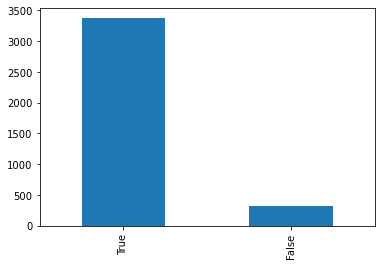

In [7]:
# plotting bar charts of free vs.paid
udemy['is_paid'].value_counts().plot.bar()

<AxesSubplot:>

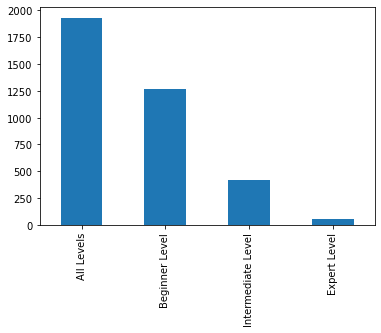

In [8]:
# plotting bar charts of course level
udemy['level'].value_counts().plot.bar()

<AxesSubplot:>

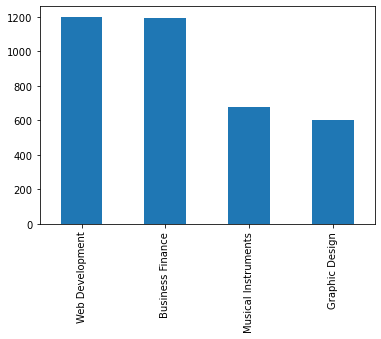

In [9]:
# plotting bar charts of subjects
udemy['subject'].value_counts().plot.bar()

In [10]:
# exploring the average stats of paid vs.free 
num_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
def get_avg(feature): 
    return([udemy.groupby(['is_paid'])[f].mean()for f in feature])
print(get_avg(num_features))

[is_paid
False     0.00000
True     72.12886
Name: price, dtype: float64, is_paid
False    11533.951613
True      2429.808492
Name: num_subscribers, dtype: float64, is_paid
False    425.929032
True     131.437945
Name: num_reviews, dtype: float64, is_paid
False    21.416129
True     41.829276
Name: num_lectures, dtype: float64, is_paid
False    2.210753
True     4.267904
Name: content_duration, dtype: float64]


### 3.2.2. EDA of Numerical Features

Next, we look at the distribution of numerical features. Most of these distributions are skewed to the right.

The correlation plots show that there are some features that are highly correlated with one another, such as num_reviews and num_subscribers (corr = 0.65) and num_lectures and content_duration (corr = 0.8). In the machine learning task, only one feature from each pair will be used.

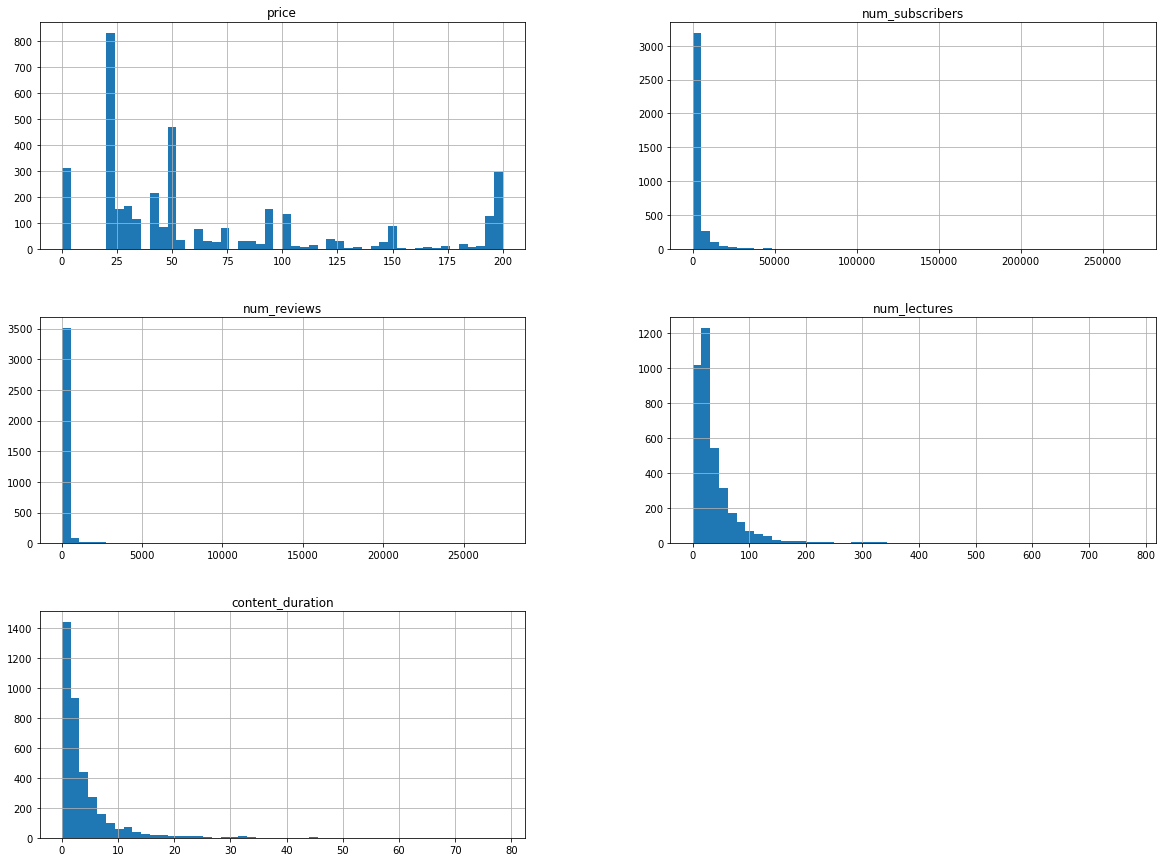

In [11]:
# plotting histograms of key numerical features 
num_features = ['price','num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
udemy[num_features].hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# exploring the average stats of paid vs.free 
def get_avg(feature): 
    return([udemy.groupby(['is_paid'])[f].mean()for f in feature])
print(get_avg(num_features))

[is_paid
False     0.00000
True     72.12886
Name: price, dtype: float64, is_paid
False    11533.951613
True      2429.808492
Name: num_subscribers, dtype: float64, is_paid
False    425.929032
True     131.437945
Name: num_reviews, dtype: float64, is_paid
False    21.416129
True     41.829276
Name: num_lectures, dtype: float64, is_paid
False    2.210753
True     4.267904
Name: content_duration, dtype: float64]


C:\Users\xiche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


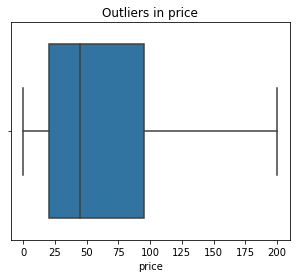

C:\Users\xiche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


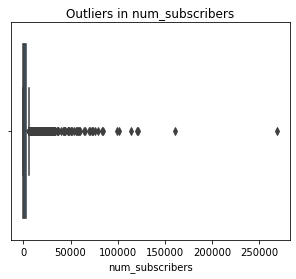

C:\Users\xiche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


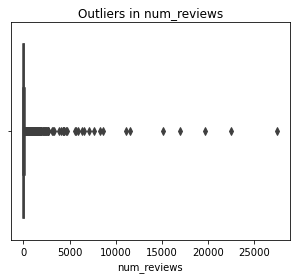

C:\Users\xiche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


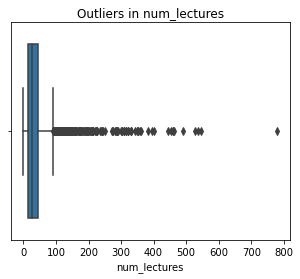

C:\Users\xiche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


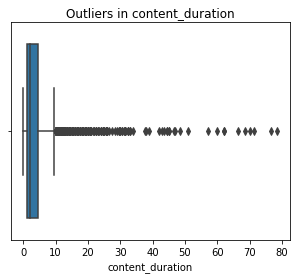

In [13]:
#plotting boxplots for numeric feature(s) and the target 
for col in num_features:
    f, ax = plt.subplots(figsize = (5,4))
    ax = sns.boxplot(udemy[col])
    ax.set_title(f"Outliers in {col}")
    plt.show()

From observing the plots of numeric features, all but one (price) has skewed distributions with a lot of outliers, these features may need to be log-transformed in model building.

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='num_subscribers', ylabel='price'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='price'>,
        <AxesSubplot:xlabel='num_lectures', ylabel='price'>,
        <AxesSubplot:xlabel='content_duration', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='num_subscribers'>,
        <AxesSubplot:xlabel='num_subscribers', ylabel='num_subscribers'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='num_subscribers'>,
        <AxesSubplot:xlabel='num_lectures', ylabel='num_subscribers'>,
        <AxesSubplot:xlabel='content_duration', ylabel='num_subscribers'>],
       [<AxesSubplot:xlabel='price', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_subscribers', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_lectures', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='content_duration', ylabel='num_reviews'>],
     

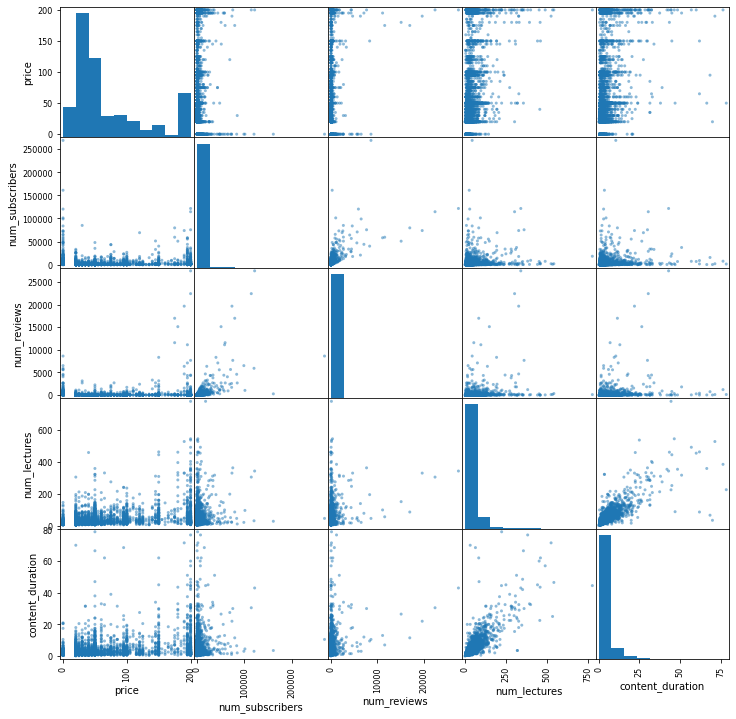

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(udemy[num_features], figsize=(12, 12))

                     price  num_subscribers  num_reviews  num_lectures  \
price             1.000000         0.050769     0.113696      0.330160   
num_subscribers   0.050769         1.000000     0.649946      0.157746   
num_reviews       0.113696         0.649946     1.000000      0.243029   
num_lectures      0.330160         0.157746     0.243029      1.000000   
content_duration  0.293450         0.161839     0.228889      0.801647   

                  content_duration  
price                     0.293450  
num_subscribers           0.161839  
num_reviews               0.228889  
num_lectures              0.801647  
content_duration          1.000000  


<AxesSubplot:>

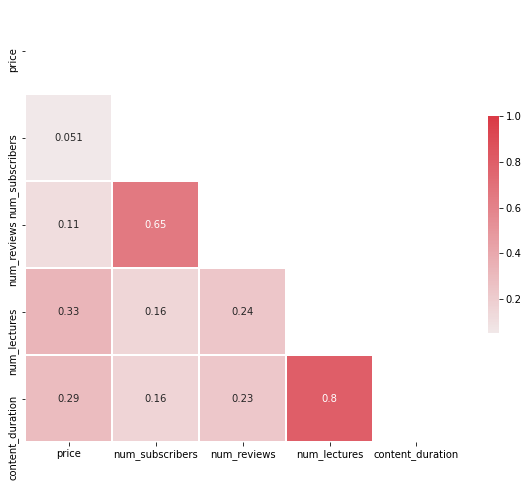

In [15]:
# determining correlations among numerical features 
corr  = udemy[num_features].corr()
print(corr) # display correlation between numeric features 

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<AxesSubplot:xlabel='price'>

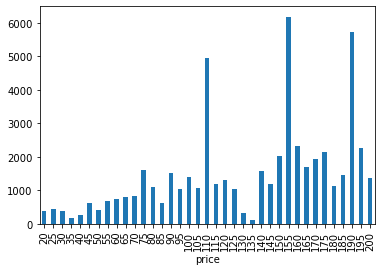

In [16]:
udemy[udemy['is_paid']].groupby(by = "price").median()['num_subscribers'].plot(kind = "bar")

The relationship between price and median subscriber count at that price is rather surprising. One may assume as the price rises, fewer people will be willing to pay, but this does not seems to be the case with udemy classes. The subscirber count seems to increase with the price.

## 3.3. Addressing Potential Questions about Dataset

__There are multiple data analytics questions that can be asked of this dataset, such as:__ 
1. What are the most popular or reviewed courses on Udemy?
2. What are the best free and paid courses by subject?
3. Which courses generated the most revenue/profit? 
4. How are different characteristics of a course related? 
5. How are different courses related to one another? 
6. Which courses were the most popular in the year they were published? 

We answer some of the questions in our EDA.
- What are the most popular or viewed courses on Udemy?

In [17]:
popular = udemy.sort_values(['num_subscribers'], ascending=False).head()['course_title']
most_reviewed = udemy.sort_values(['num_reviews'], ascending=False).head()['course_title']
print("The most poopular courses on udemy are: ", "\n\n", popular, "\n\n")
print("The most reviewed courses on udemy are: ", "\n\n", most_reviewed)

The most poopular courses on udemy are:  

 2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
Name: course_title, dtype: object 


The most reviewed courses on udemy are:  

 3230                           The Web Developer Bootcamp
3232                The Complete Web Developer Course 2.0
3204    Angular 4 (formerly Angular 2) - The Complete ...
3247            JavaScript: Understanding the Weird Parts
3254                              Modern React with Redux
Name: course_title, dtype: object


- What are the best free and paid courses by subject?

In [18]:
subjects = udemy['subject'].unique()
for subject in subjects: 
    df = udemy[udemy['subject']==subject]
    free_best = df[df['is_paid']==False].sort_values(['num_subscribers'], ascending=False).head(1)['course_title']                                                                         
    paid_best = df[df['is_paid']==True].sort_values(['num_subscribers'], ascending=False).head(1)['course_title']
    print(f"The best free udemy course for {subject} is {free_best}")
    print(f"The best paid udemy course for {subject} is {paid_best}")
    print("-"*100)

The best free udemy course for Business Finance is 492    Bitcoin or How I Learned to Stop Worrying and ...
Name: course_title, dtype: object
The best paid udemy course for Business Finance is 40    The Complete Financial Analyst Course 2017
Name: course_title, dtype: object
----------------------------------------------------------------------------------------------------
The best free udemy course for Graphic Design is 1461    Photoshop In-Depth: Master all of Photoshop's ...
Name: course_title, dtype: object
The best paid udemy course for Graphic Design is 1213    Photoshop for Entrepreneurs - Design 11 Practi...
Name: course_title, dtype: object
----------------------------------------------------------------------------------------------------
The best free udemy course for Musical Instruments is 1896    Free Beginner Electric Guitar Lessons
Name: course_title, dtype: object
The best paid udemy course for Musical Instruments is 1979    Pianoforall - Incredible New Way To Learn Pi

In [19]:
from sklearn.model_selection import train_test_split
import time
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, average_precision_score
from sklearn.metrics import classification_report

In [21]:
def log_transform(x): 
    return np.log(x+1)

In [22]:
#define performance report function 
def performance_report(model): 
    print(f'{model} Classifier Average Precision: \n{average_precision_score(y_test, y_pred)}\n')
    print(f'{model} Classifier AUC: \n{roc_auc_score(y_test, y_pred)}\n')
    print(f'{model} Classification Report: \n\n{classification_report(y_test, y_pred)}\n')
    print("Execution time: " + str((time.time() - start_time)) + ' s')

# 4. Determination of Optimal Pricing for Revenue Maximization

As a content provider for paid courses on the Internet, an important goal is to generate enough revenue from the course to make it profitable. 

Finding the price point that maximizes the course’s revenue is not an easy thing to do. If the price too high, fewer students will subscribe. If the price is too low, lots of people will subsribe, but they will pay too little for the course to generate a meaningful profit. The expected relationaship between price and number of subcribers can be described by the graph below:

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 
url = 'https://cloud.netlifyusercontent.com/assets/344dbf88-fdf9-42bb-adb4-46f01eedd629/90d21f5f-c55b-4ac2-9c24-4f10013ef0ec/curve.png'
Image(url= url, width=600)

The goal of our model is therefore to find that point in-between that drives the largest number of students willing to pay the highest amount for the course: the revenue maximization point. In other words, this is to maximize the revenue, which is a product of Price and Number of subscribers. 

There are two steps to our algorithm: 
1. Predict a price range based on the courses' intrinsict parameters, and 

2. Predict the revenue based on the prices in the price range found in step 1.

### 4.1. Step 1: Price Prediction

#### 4.1.1. Data Pre-processing & Feature Selection

Fist, create a column for the revenue of a class, which is price times number of subscribers.

In [35]:
df = udemy.copy()
df['revenue'] = [df.price[i] * df.num_subscribers[i] for i in range(df.shape[0])]
# Delete all free courses from dataset
df = df[df.is_paid == True].reset_index()

In [36]:
#df.describe(include = 'all')

C:\Users\xiche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue'>

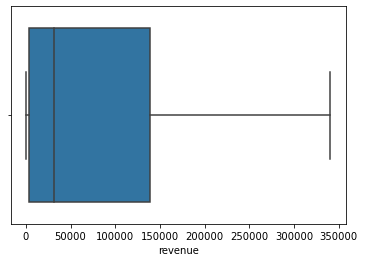

In [37]:
sns.boxplot(df.revenue, showfliers = False)

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

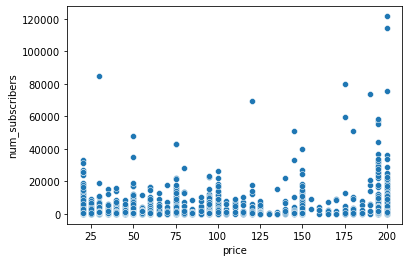

In [38]:
sns.scatterplot(x = df.price, y = df.num_subscribers)

We can see that depending on the size of the audience base and the course price, Udemy instructors can earn a total revenue of up to **24 million dollars**! 

Since no two courses are alike, they should not be priced alike either. We will adopt a differentiated pricing approach, taking into account different intrinsic variables including length, level, subject, etc. We will start by using each course’s unique features to generate its initial price rangee. Then, we will use that data to predict the number of subscribers and in turn the revenue to seek the right price for each course.

We will also create another column named "**num_comp**", which is an the inverse of the number of competing courses (courses in the same subject and same level). This is an indcation of how unique the course offering is in the Udemy marketplace.

In [39]:
comp = dict(df.groupby(["subject", "level"]).size())
df['num_comp'] = [1/comp[df['subject'][i], df['level'][i]] for i in range(df.shape[0])]
df['num_comp'].unique()

array([0.00154799, 0.00819672, 0.00333333, 0.03225806, 0.00444444,
       0.00353357, 0.01818182, 0.2       , 0.00374532, 0.00378788,
       0.01041667, 0.14285714, 0.00163666, 0.00847458, 0.00309598,
       0.06666667])

We will also apply TFIDF tranformation on the course_title column to generate title-related features.

In [40]:
#df.head()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Only take the top 50 features
vectorize = TfidfVectorizer(analyzer='word',stop_words= 'english', token_pattern=r'(?u)\b[A-Za-z]+\b', max_features = 20)
response = vectorize.fit_transform(df['course_title'])
#print(response)
df_tfidf = pd.DataFrame(data = response.toarray(), columns = [i +'_name' for i in vectorize.get_feature_names()])
df_tfidf.shape
df = pd.concat([df, df_tfidf], axis=1, ignore_index=False, verify_integrity = True)
#df.head()

C:\Users\xiche\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['url_name'] = [df['url'][i].split('/')[3] for i in range(len(df['url']))]
vectorize = TfidfVectorizer(analyzer='word',stop_words= 'english', token_pattern=r'(?u)\b[A-Za-z]+\b', max_features = 20)
response = vectorize.fit_transform(df['url_name'])
df_tfidf = pd.DataFrame(data = response.toarray(), columns = [i +'_url' for i in vectorize.get_feature_names()])
df_tfidf.shape
df = pd.concat([df, df_tfidf], axis=1, ignore_index=False, verify_integrity = True)
df.head()

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,...,javascript_url,learn_url,photoshop_url,php_url,piano_url,play_url,trading_url,web_url,website_url,wordpress_url
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now we will drop unwanted features:
- index, course_id, course_title, url, is_paid 
    - not needed
- num_subscribers, num_reviews, revenue
    - data leakage

In [43]:
df2 = df.drop(columns=['index', 'is_paid', 'course_id', 'course_title', 'url', 'url_name', 'num_subscribers', 'num_reviews', 'revenue'], axis=1) 

#### 4.1.2. Regression Models for Price Prediction

In [44]:
# splitting dataset to train and test 

X = df2.drop(columns=['price'], axis=1) 
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3)
X.head()

,num_lectures,level,content_duration,published_timestamp,subject,num_comp,beginner_name,beginners_name,build_name,complete_name,...,javascript_url,learn_url,photoshop_url,php_url,piano_url,play_url,trading_url,web_url,website_url,wordpress_url
0,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,0.001548,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,0.001548,0.000000,0.0,0.0,0.726906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,0.008197,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,0.001548,0.708355,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,0.008197,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
#building pipeline

num_features = ['content_duration', 'num_lectures']
for i in X.columns[5:]:
    num_features.append(i)
numeric_transformer = Pipeline(steps=[
    ('transformer', FunctionTransformer(log_transform)),
    ('scaler', StandardScaler())])
cat_features = ['level', 'subject']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [46]:
from sklearn.linear_model import LinearRegression
LR_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])
# Train the model with pre-processing steps
LR_model.fit(X_train, y_train)
scores = cross_val_score(LR_model, X_test, y_test, cv=10, scoring='r2')
print(f"Score - linear regression: \n {scores.mean()}")
#LR_model.named_steps['regression'].coef_.shape

Score - linear regression: 
 0.09906319164931227


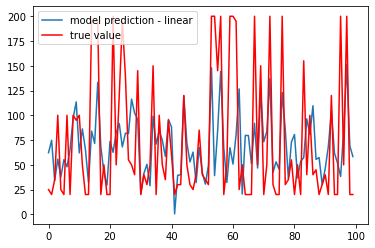

In [47]:
y_pred_LR = LR_model.predict(X_test)
plt.plot(range(100), y_pred_LR[:100], label='model prediction - linear')
#plt.plot(range(100), airbnb_pred_dt[:100], label='model prediction - decision tree')
plt.plot(range(100), y_test[:100], 'r', label='true value')
plt.legend()

In [48]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree model 
DT_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', DecisionTreeRegressor())])
# Train the model with pre-processing steps
DT_model.fit(X_train,y_train)
scores = cross_val_score(DT_model, X_test, y_test, cv=10, scoring='r2')
print(f"Score - decision tree regressor: \n {scores.mean()}")

Score - decision tree regressor: 
 -0.7216912656857788


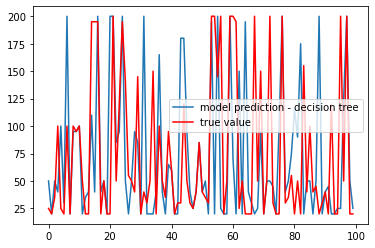

In [49]:
y_pred_DT = DT_model.predict(X_test)
plt.plot(range(100), y_pred_DT[:100], label='model prediction - decision tree')
#plt.plot(range(100), airbnb_pred_dt[:100], label='model prediction - decision tree')
plt.plot(range(100), y_test[:100], 'r', label='true value')
plt.legend()

In [50]:
from sklearn.linear_model import Lasso

LS_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Lasso())])
# Train the model with pre-processing steps
LS_model.fit(X_train,y_train)
scores = cross_val_score(LS_model, X_test, y_test, cv=10, scoring='r2')
print(f"Score - lasso regression: \n {scores.mean()}")

Score - lasso regression: 
 0.14687557525559497


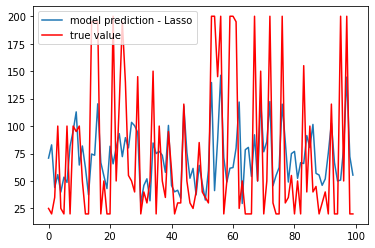

In [51]:
y_pred_LS = LS_model.predict(X_test)
plt.plot(range(100), y_pred_LS[:100], label='model prediction - Lasso')
plt.plot(range(100), y_test[:100], 'r', label='true value')
plt.legend()

In conclusion, the model performances are as follows:

In [52]:
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(y_test, y_pred_LR)
mse_dt = mean_squared_error(y_test, y_pred_DT)
mse_lasso = mean_squared_error(y_test, y_pred_LS)
rmse_linear = np.sqrt(mse_linear)
rmse_dt = np.sqrt(mse_dt)
rmse_lasso = np.sqrt(mse_lasso)
print(f'RMSE:\nLinear Regression: {rmse_linear}\nDecision Tree: {rmse_dt}\nLasso: {rmse_lasso}')

RMSE:
Linear Regression: 56.33515691071502
Decision Tree: 74.62559126267972
Lasso: 56.22311125539987


While the Lasso regression model seems to be best out of the three whith the highest score and lowest RMSE, it still has a low R^2 value and may not be an adequate model for price prediction. 

Therefore, for step 2 of our analysis (revenue prediction), we will not use the predicted prices as an input. Rather, we will just run the prediction model using a list of all possible prices from 20 to 200, with 5 as the increment.

In [53]:
price_range = np.linspace(20, 200, int((200-20)/5 + 1))
price_range

array([ 20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.,  95., 100., 105., 110., 115., 120., 125.,
       130., 135., 140., 145., 150., 155., 160., 165., 170., 175., 180.,
       185., 190., 195., 200.])

### 4.2. Regression Model for Revenue Optimization

#### 4.2.1 Buidling the Model

Adding a feature for price competitiveness, which is a measure how the current price compares to the mean price in its group (same subject and same level).

In [54]:
price_comp = dict(df.groupby(["subject", "level"]).mean().price)
df['price_comp'] = [price_comp[df['subject'][i], df['level'][i]]/df['price'][i] for i in range(df.shape[0])]

Because the expected relationship between price and number of subscribers is an inverse relationship, we are applying an inverse transformation on the "price" column and storing it as a new column, "price_inv".

In [55]:
df['price_inv'] = [1/(df['price'][i]**2) for i in range(df.shape[0])]

In [56]:
df3 = df.drop(columns=['index', 'is_paid', 'course_id', 'course_title', 'url', 'url_name', 'num_reviews', 'revenue', 'price'], axis=1) 
df3['log_num_subscribers'] = [np.log(i) for i in df3['num_subscribers']]
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3 = df3.dropna(axis = 0, how="any")
#df3['log_num_subscribers'].hist()

<ipython-input-56-ee0d675b32fc>:2: RuntimeWarning: divide by zero encountered in log
  df3['log_num_subscribers'] = [np.log(i) for i in df3['num_subscribers']]


In [57]:
X = df3.drop(columns=['num_subscribers', 'log_num_subscribers'], axis=1) 
y = df3['log_num_subscribers']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)
X.head()

,num_lectures,level,content_duration,published_timestamp,subject,num_comp,beginner_name,beginners_name,build_name,complete_name,...,photoshop_url,php_url,piano_url,play_url,trading_url,web_url,website_url,wordpress_url,price_comp,price_inv
0,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,0.001548,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405108,0.000025
1,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,0.001548,0.000000,0.0,0.0,0.726906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.080289,0.000178
2,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,0.008197,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.540073,0.000494
3,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,0.001548,0.708355,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.852860,0.000111
4,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,0.008197,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.346516,0.000025


In [58]:
#building pipeline

num_features = ['content_duration', 'num_lectures', ]
for i in X.columns[7:]:
    num_features.append(i)
numeric_transformer = Pipeline(steps=[
    ('transformer', FunctionTransformer(log_transform)),
    ('scaler', StandardScaler())])
cat_features = ['level', 'subject', 'published_timestamp']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [59]:
from sklearn.linear_model import LinearRegression
LR_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

# Train the model with pre-processing steps
LR_model.fit(X_train, y_train)
scores = cross_val_score(LR_model, X_test, y_test, cv=10, scoring='r2')
print(f"Score - linear regression: \n {scores.mean()}")
#LR_model.named_steps['regression'].coef_.shape

Score - linear regression: 
 0.29983376809451556


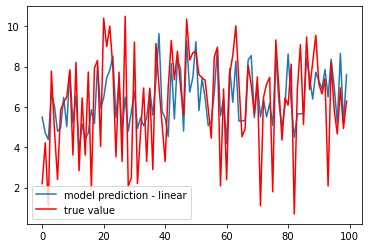

In [60]:
y_pred_LR = LR_model.predict(X_test)
plt.plot(range(100), y_pred_LR[:100], label='model prediction - linear')
plt.plot(range(100), y_test[:100], 'r', label='true value')
plt.legend()

In [61]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree model 
DT_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', DecisionTreeRegressor())])
# Train the model with pre-processing steps
DT_model.fit(X_train,y_train)
scores = cross_val_score(DT_model, X_test, y_test, cv=10, scoring='r2')
print(f"Score - decision tree regressor: \n {scores.mean()}")

Score - decision tree regressor: 
 -0.16603697569949688


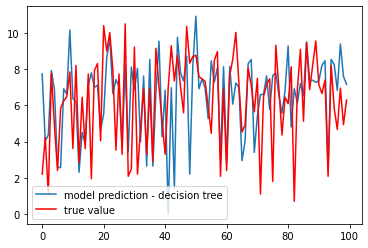

In [62]:
y_pred_DT = DT_model.predict(X_test)
plt.plot(range(100), y_pred_DT[:100], label='model prediction - decision tree')
plt.plot(range(100), y_test[:100], 'r', label='true value')
plt.legend()

In [63]:
from sklearn.linear_model import Ridge

RD_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])
# Train the model with pre-processing steps
RD_model.fit(X_train,y_train)
scores = cross_val_score(RD_model, X_test, y_test, cv=10, scoring='r2')
print(f"Score - ridge regression: \n {scores.mean()}")

Score - ridge regression: 
 0.3016162659676615


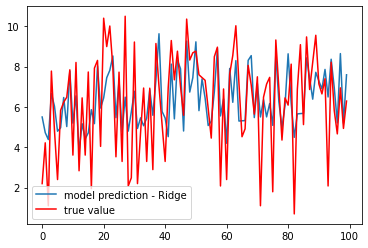

In [64]:
y_pred_RD = RD_model.predict(X_test)
plt.plot(range(100), y_pred_RD[:100], label='model prediction - Ridge')
plt.plot(range(100), y_test[:100], 'r', label='true value')
plt.legend()

In [65]:
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(y_test, y_pred_LR)
mse_dt = mean_squared_error(y_test, y_pred_DT)
mse_ridge = mean_squared_error(y_test, y_pred_RD)
rmse_linear = np.sqrt(mse_linear)
rmse_dt = np.sqrt(mse_dt)
rmse_ridge = np.sqrt(mse_ridge)
print(f'RMSE:\nLinear Regression: {rmse_linear}\nDecision Tree: {rmse_dt}\nRidge: {rmse_ridge}')

RMSE:
Linear Regression: 1.8553742635869535
Decision Tree: 2.3922990950038945
Ridge: 1.8555907382416448


The **ridge regressor** has the best performance out of the three. Therefore, this is the model we will select for the next step. We wil apply the model on a dataset with alternative price values to investigate which price point would generate the biggest revenue.

#### 4.2.2. Predicting Price Revenue Optimization

For example, for the "Complete GST Course & Certification" course, the original price is 75 and the number of subsribers is 2792. We will vary the price and predict the number of subscribers and the resulting revenue. Will the course attract more subscribers if they lower the price, and will this lead to a higher or lower revenue? These are questions we are hoping to answer with our analysis.

In [66]:
sample = 1
display(df.loc[sample:sample])

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,...,photoshop_url,php_url,piano_url,play_url,trading_url,web_url,website_url,wordpress_url,price_comp,price_inv
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.080289,0.000178


In [67]:
# Creating the prediction dataframe
df4 = df3.loc[sample:sample]
for i in range(len(price_range)):
    df4 = df4.append(df3.loc[sample:sample])  
df4 = df4.reset_index()

for i in range(len(price_range)):
    df4['price_inv'][i+1] = 1/(price_range[i]**2)
    
#price_comp = dict(df.groupby(["subject", "level"]).mean().price)
df4['price_comp'] = [price_comp[df4['subject'][i], df4['level'][i]]*df4['price_inv'][i] for i in range(df4.shape[0])]
X = df4.drop(columns=['num_subscribers', 'log_num_subscribers'], axis=1) 
X = X.dropna(axis = 0, how="any")

<ipython-input-67-f96a0fdac2a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_inv'][i+1] = 1/(price_range[i]**2)


In [68]:
y_pred_RD = RD_model.predict(X[1:])
pred = [(np.e)**i for i in y_pred_RD]
revenue = [pred[i] * price_range[i] for i in range(len(pred))]
for i in range(len(revenue)):
    if revenue[i] == max(revenue):
        print("Optimal Price for Max Revenue\n")
        print("Price: {0:5d}\nRevenue: {1:8d}\nSubscribers: {2:8d}\n".format(int(price_range[i]), int(revenue[i]), int(pred[i])))

Optimal Price for Max Revenue

Price:   200
Revenue:   875340
Subscribers:     4376



<AxesSubplot:title={'center':'Price vs subscribers'}, xlabel='Price', ylabel='Subscribers'>

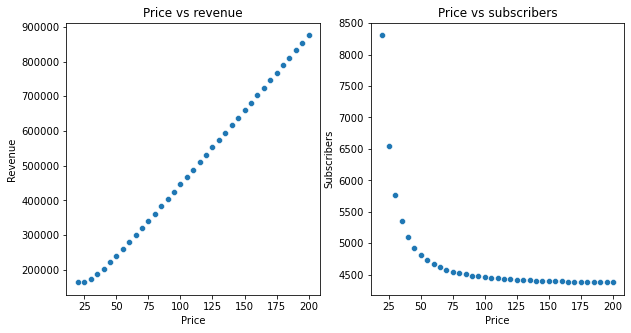

In [69]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))
ax[0].set_title('Price vs revenue')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Revenue')
ax[1].set_title('Price vs subscribers')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Subscribers')
sns.scatterplot(ax = ax[0], x = price_range, y = revenue)
sns.scatterplot(ax = ax[1], x = price_range, y = pred)

We see that raising the price does lead to a decrease in the number of subscribers. However, it seems that this decrease is the steepest at lower prices and slows down at the higher price range. Surprisingly, this did not seem to significantly impact the total revenue, meaning that the loss in the number of subscribes is more than compensated by the increase in price, leading to an increase in total revenue.

## 5. Conclusion

In this project, we chose the following two machine learning tasks and built models using different ML algorisms to find the optimal model.

For the revenue optimization, we were not able to build regression models for the price and revenue prediction tasks with high scores. We extracted 42 additional features from the original dataset including 40 features from the TF-IDF matrices built from the course name and URL columns and 2 features indicating the competiveness of the course. We also performed inverse transformation on the "price" column because the theoretical relationship between price and nunmber of subscribers is an inverse relationship. The resulting model for predicting revenue has a R2 score of 0.30 and RMSE of 1.9. The model's behavior matches the thoeretical prediction, where ascending price leads to descending subscribers, but the overall revenue still increases because the increasing price makes up for the revenue loss from losing subscribers.

Based on the model, we can suggest course instructors on Udemy to always price their courses highly to maximize revenue. However, we know that profitibility is not the only goal of Udemy. As one of the biggest MOOCs, Udemy's mission is to improve lives through affordable, and raising all course prices to the 200-dollar range would greatly reduce the assessibility of the courses, which does not align with their mission.

## 6. Future Work

The model performance can by improved by collecting more data. The dataset we used only contains 12 attributes for 3,000 + courses spanning four subject categories. It would be helpful to have a dataset that contains a more complete set of the subject categories as well as more attributes related to the intrinsict nature of the course. For example, the subject column can be further split into sub-subjetcs. More details on the course itself can be included, like the description and course requirements. Some of these features can also include information about the instructor, such as their rating, number of reviews, number of students, and number of courses. In a real-world business scenario, the model can also be improve through methods like A/B testing, where different prices are rolled out for a course to see the students' responses to each course at its assigned price, and the new data can be input into the model to make adjustments and continue to seek the right price for each course.